![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [ ]:
!pip install pingouin

In [4]:
# Start your code here!
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, t
import matplotlib.pyplot as plt
import pingouin

women = pd.read_csv("women_results.csv", parse_dates=["date"])
men = pd.read_csv("men_results.csv", parse_dates=["date"])

women = women[(women["date"]>= "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]
men = men[(men["date"]>= "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]

# Create column with number of goals
women["n_goals"]= women["home_score"] + women["away_score"]
men["n_goals"]= men["home_score"] + men["away_score"]

print(women.head())

      Unnamed: 0       date      home_team    away_team  home_score  \
1600        1600 2003-09-20        Nigeria  North Korea           0   
1601        1601 2003-09-20         Norway       France           2   
1602        1602 2003-09-20        Germany       Canada           4   
1603        1603 2003-09-20          Japan    Argentina           6   
1604        1604 2003-09-21  United States       Sweden           3   

      away_score      tournament  n_goals  
1600           3  FIFA World Cup        3  
1601           0  FIFA World Cup        2  
1602           1  FIFA World Cup        5  
1603           0  FIFA World Cup        6  
1604           1  FIFA World Cup        4  


<ipython-input-4-54909c5f38ab>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women["n_goals"]= women["home_score"] + women["away_score"]
<ipython-input-4-54909c5f38ab>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men["n_goals"]= men["home_score"] + men["away_score"]


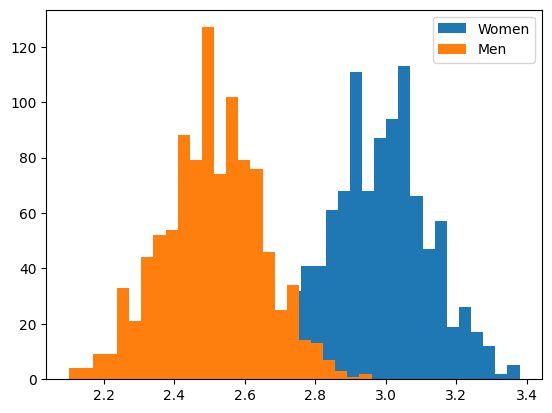

In [5]:
# Perform resampling analysis (bootstrap) to calculate the means of random samples
w_mean_samples = []
m_mean_samples = []

for i in range(1000):
    w_mean_samples.append(
        women.sample(n=100)["n_goals"].mean()
    )
    m_mean_samples.append(
        men.sample(n=100)["n_goals"].mean()
    )


# Plot to see if it's a normal distribution
plt.hist(w_mean_samples, bins=25, label = 'Women')
plt.hist(m_mean_samples, bins=25, label = 'Men')
plt.legend()

plt.show()

In [8]:
# Perform Mann–Whitney U test

significance_level = 10/100

wilco= mannwhitneyu(women["n_goals"],
               men["n_goals"],
               alternative= "greater")

# Extract p-value as a float
p_val = wilco.pvalue

result = "reject null hypothesis" if p_val < significance_level else "fail to reject null hypothesis"
result_dict = {"p_val": p_val, "result": result}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject null hypothesis'}


The p-value indicates insufficient evidence supporting the null hypothesis,

$H_0$: "The mean number of goals scored in women's international soccer matches is equal to that of men's."

Therefore, we reject it in favor of the alternative hypothesis:

$H_A$: "The mean number of goals scored in women's international soccer matches is greater than that of men's."

